<a href="https://colab.research.google.com/github/min02choi/Data-Analysis-and-Applications/blob/master/Week13/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 분류 (Classification): 지도 학습의 일종 - ex) k-NN (Nearest Neighbor)
- 군집화 (Clustering): 비지도 학습의 일종 - ex) k-means clustering

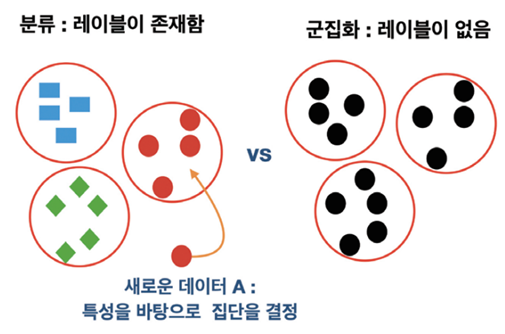

**1. k-NN 알고리즘에 사용할 견종의 표본 집합 시각화**

- k개의 가까운 이웃을 살표보고 **다수결 방식**으로 데이터의 클래스를 할당한다.

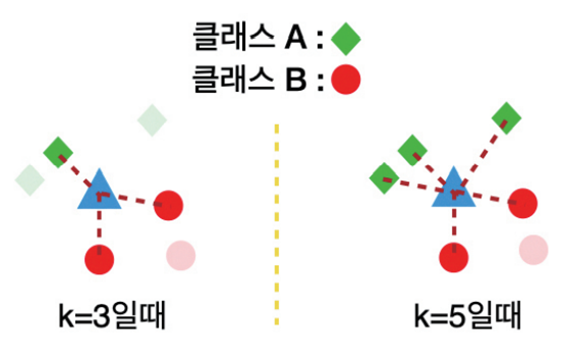

- 개체의 길이와 높이 정보를 바탕으로 **닥스훈트**와 **진돗개**를 구분해보자.

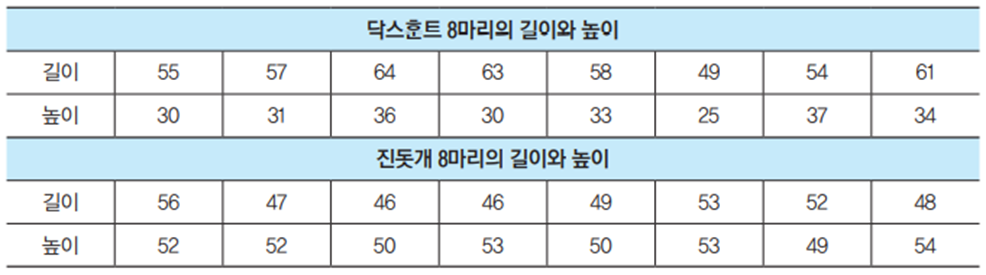

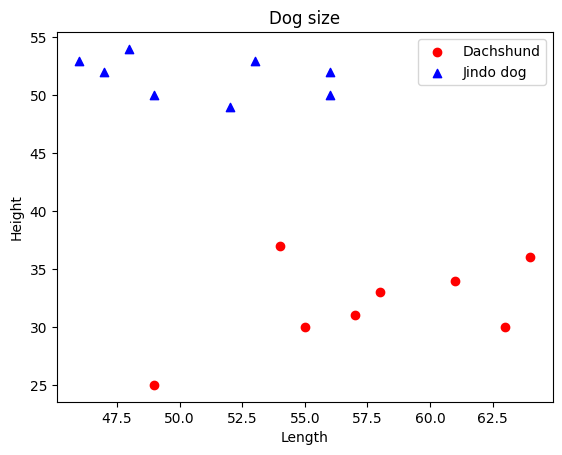

In [1]:
import matplotlib.pyplot as plt

# 닥스훈트의 길이와 높이 데이터
dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]

# 진돗개의 길이와 높이 데이터
jin_length = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]

plt.scatter(dach_length, dach_height, c='r', label='Dachshund')
plt.scatter(jin_length, jin_height,c='b',marker='^', label='Jindo dog')

plt.xlabel('Length')
plt.ylabel('Height')
plt.title("Dog size")
plt.legend(loc='upper right')

**2. k-NN 분류기를 실행**
- 새로운 관측 데이터 (new Data)

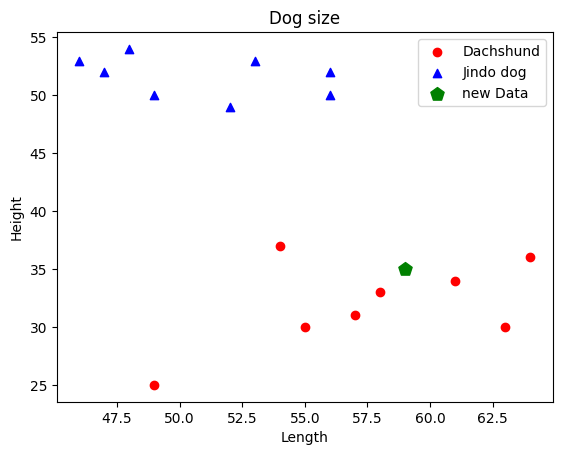

In [2]:
plt.scatter(dach_length, dach_height, c='r', label='Dachshund')
plt.scatter(jin_length, jin_height,c='b',marker='^', label='Jindo dog')

plt.xlabel('Length')
plt.ylabel('Height')
plt.title("Dog size")

############################################################################

newdata_length = [59]    # 새로운 데이터의 길이
newdata_height = [35]    # 새로운 데이터의 높이

# 새 데이터의 표식은 오각형(pentagon)으로 설정하고, 레이블은 new Data로
plt.scatter(newdata_length, newdata_height, s=100, marker='p',c='g', label='new Data')
plt.legend(loc='upper right')

- 입력 데이터를 합치고 (stack)
- 닥스훈트는 0으로, 진돗개는 1로 레이블링

In [3]:
import numpy as np

d_data = np.column_stack((dach_length, dach_height))
d_label = np.zeros(len(d_data))   # 닥스훈트는 0으로 레이블링
j_data = np.column_stack((jin_length, jin_height))
j_label = np.ones(len(j_data))   # 진돗개는 1로 레이블링

newdata = np.column_stack((newdata_length, newdata_height))

dogs = np.concatenate((d_data, j_data))
labels = np.concatenate((d_label, j_label))

print('Inputs: ', dogs)
print('Labels: ', labels)
print('new Data: ', newdata)

Inputs:  [[55 30]
 [57 31]
 [64 36]
 [63 30]
 [58 33]
 [49 25]
 [54 37]
 [61 34]
 [56 52]
 [47 52]
 [56 50]
 [46 53]
 [49 50]
 [53 53]
 [52 49]
 [48 54]]
Labels:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
new Data:  [[59 35]]


- 사이킷런의 "KNeighborsClassifier" 클래스를 통해서 k-NN 분류기를 구현 가능
- 다른 머신러닝 모델과 마찬가지로 **fit** 메소드를 통해서 학습하며, **predict** 메소드를 통해서 시험할 수 있습니다.

In [4]:
from sklearn.neighbors import KNeighborsClassifier

dog_classes = {0:'닥스훈트', 1:'진돗개'}

k = 3     # k를 3으로 두고 kNN 분류기를 만들어 보자
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(dogs, labels)

y_pred = knn.predict(newdata)
print('데이터', newdata, ', 판정 결과:', y_pred[0], dog_classes[y_pred[0]])

데이터 [[59 35]] , 판정 결과: 0.0 닥스훈트


- k-NN에서 이웃한 데이터를 얻기 위해서는 **kneighbors** 메소드를 이용합니다.

In [ ]:
plt.scatter(dach_length, dach_height, c='r', label='Dachshund')
plt.scatter(jin_length, jin_height,c='b',marker='^', label='Jindo dog')
plt.scatter(newdata_length, newdata_height, s=100, marker='p', c='g', label='new Data')

plt.xlabel('Length')
plt.ylabel('Height')
plt.title("Dog size")
plt.legend(loc='upper right')

#########################################################################################

distances, indexes = knn.kneighbors(newdata)
print('Inputs: ', dogs)
print('Indexes: ', indexes)
print('Distances: ', distances)
print('Indexe Inputs: ', dogs[indexes])

nearest_neighbors = dogs[indexes]

print('Indexe Inputs\' Lengths: ', nearest_neighbors[0, :, 0])
print('Indexe Inputs\' Heights: ', nearest_neighbors[0, :, 1])

plt.scatter(nearest_neighbors[0, :, 0], nearest_neighbors[0, :, 1], marker='D', color='orange')

**3. k-NN 활용 예제**
- 붓꽃 (Iris) 데이터 준비하기

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.data[:3]     # 최초 3개 데이터의 값을 출력

- **입력**: 붓꽃의 꽃받침(sepal)과 꽃잎(petal)의 길이(length)와 너비(width)

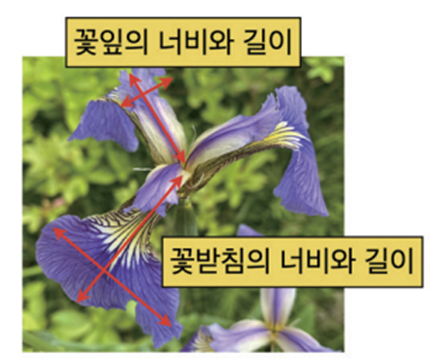

In [ ]:
print('iris 데이터의 형태:', iris.data.shape)

In [ ]:
print('iris 데이터의 속성들:', iris.feature_names)

In [ ]:
print('iris 데이터의 레이블:', iris.target)

- 입력 값들을 바탕으로 붓꽃의 꽃종 3개 중에 하나를 예측
- 붓꽃 종의 이름은 Setosa (0), Versicolor (1), Virginica (2)

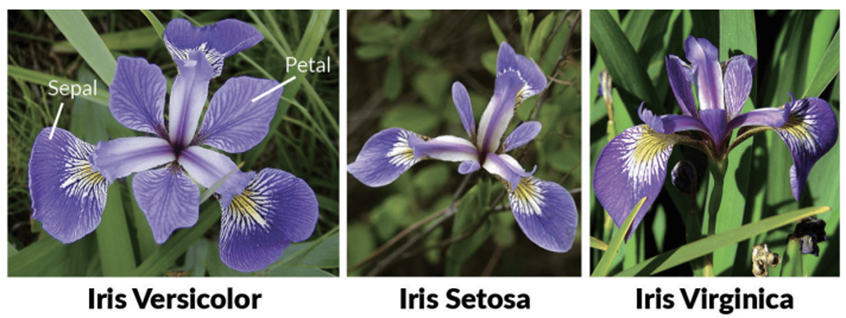

- pandas DataFrame Table 생성

In [ ]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

In [ ]:
iris_df.describe()

In [ ]:
iris_df['target'].value_counts()

In [ ]:
X = iris.data
y = iris.target
print(X)
print(y)

- 붓꽃 데이터로 **KNeighborsClassifier** 학습하기

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

scores = metrics.accuracy_score(y_test, y_pred)

print('n_neighbors가 %d일때 정확도: %.3f' % (k, scores))

In [ ]:
classes = {0:'setosa', 1:'versicolor', 2:'virginica'}

# 새로운 데이터를 제시해 보자.
X = [[4, 2, 1.3, 0.4],
     [4, 3, 3.2, 2.2]]
y = knn.predict(X)

print(X[0], '특성을 가지는 품종:', classes[y[0]])
print(X[1], '특성을 가지는 품종:', classes[y[1]])

**4. k-means Clustering (군집화) 예제**
- 아래의 데이터는 100명의 사용자의 **게임이용시간**과 **게임레벨** 담고 있다.
- 아래의 정보를 바탕으로 **네 종류의 그룹**으로 나누어 분석해보고자 한다.

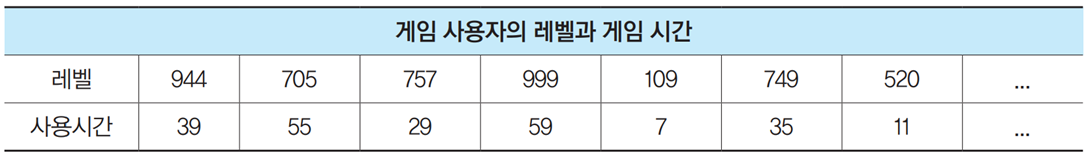

- 예측컨대 4가지 종류의 그룹은 아래와 같을 것이다.
1. 게임을 오래하고 게임 레벨도 높은 고객
2. 게임을 오래하고도 게임 레벨이 낮은 고객
3. 게임을 짧게하지만 게임 레벨이 높은 고객
4. 게임을 짧게하고 게임 레벨도 낮은 고객

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!gdown https://drive.google.com/uc?id=1W6Js_N5Z7lG9JMDD2REneXZbXXeeTAOi
game_usage = pd.read_csv('game_usage.csv')
game_usage.head(3)

In [ ]:
X = game_usage['time spent']
Y = game_usage['game level']

# 으뜸 게임사의 게임 이용자 분석: 산포도 그래프
plt.title("Game player data")
plt.xlabel('Time spent')
plt.ylabel('Game level')
plt.scatter(X, Y)

- 이 경우 우리는 4가지 종류의 고객에 대한 레이블링이 존재하지 않는다.
- 레이블링이 없는 집단을 비슷한 속성을 가진 집단끼리 묶는 (군집화) 알고리즘이 k-means algorithms 이다.
- k-means 알고리즘은 원리가 단순하고 직관적이며 성능이 좋은 군집화 알고리즘이다.
- 하지만 사전에 군집의 개수 k 값 (하이퍼파라메터)를 지정해야하는 단점이 있다.

- 사이킷런의 **cluster.KMeans 클래스**를 이용하면 k-means 알고리즘을 사용할 수 있다.

- 하이퍼파라메터: n_cluster: 군집의 개수, n_init 초기 중심위치 반복 회수, max_iter: 최대반복회수

In [ ]:
from sklearn import cluster

def kmeans_predict_plot(data, k):
   model = cluster.KMeans(n_clusters=k, n_init='auto')
   model.fit(data)

   labels = model.predict(data)

   colors = np.array(['red', 'green', 'blue', 'magenta'])
   plt.suptitle('k-Means clustering, k=%d' % k)
   plt.xlabel('Time spent')
   plt.ylabel('Game level')
   plt.scatter(data[:, 0], data[:, 1], color=colors[labels])

gamer_data = np.column_stack((X, Y))
kmeans_predict_plot(gamer_data, k = 4)

In [ ]:
kmeans_predict_plot(gamer_data, k = 2) # 2개의 군집 생성

In [ ]:
kmeans_predict_plot(gamer_data, k = 4) # 4개의 군집 생성

**5. 군집화 (Clustering)에서 데이터 전처리의 필요성**
- k=4로 군집화 하였을 때, 우리가 예상한대로의 군집이 아닌 y값 (Game Level)에 대해서만 4 그룹으로 군집화되었다.
- 이유를 확인하기 위해 x축 값과 (Time spent) y축의 값을 (Game level) 같은 크기 범위 안 [0, 1000] 구간에서 살표보자.

In [ ]:
kmeans_predict_plot(gamer_data, k = 4)
plt.xlim(0, 1000); plt.ylim(0, 1000)

- 데이터 정규화 방법을 이용

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(gamer_data)
n_data = scaler.transform(gamer_data)
print(gamer_data[:10])
print(n_data[:10])

In [ ]:
n_data[:, 0].min(), n_data[:, 0].max()

In [ ]:
n_data[:, 1].min(), n_data[:, 1].max()

In [ ]:
kmeans_predict_plot(n_data, k = 4) # 4개의 군집 생성